![](https://www.google.com/search?q=ufc+4k+wallpaper&sca_esv=581659348&rlz=1C1CHBF_enIN966IN966&tbm=isch&sxsrf=AM9HkKkPkoymmMECw6I06YpEkiJRB31bVQ:1699777035346&source=lnms&sa=X&ved=2ahUKEwjgjY7zgr6CAxX9zTgGHf8PAXUQ_AUoAXoECAEQAw&biw=1536&bih=742&dpr=1.25#imgrc=VSH_Fe9YrIno5M)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from plotly.offline  import download_plotlyjs,init_notebook_mode,plot, iplot
%matplotlib inline
import plotly.graph_objs as go
import plotly.offline as offline
init_notebook_mode(connected = True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


In [2]:
df = pd.read_csv("/kaggle/input/ufcdataset/data.csv")

In [3]:
df.head()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,0,0,38.0,193.0,Hounslow England,808,Amsterdam The Netherlands,Alistair Overeem,120.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,blue
1,0,0,36.0,172.0,"Chicago, Illinois United States",1054,"Chicago, Illinois United States",Ricardo Lamas,65.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
2,0,0,39.0,167.0,"Isla Vista , California USA",959,"Sacramento, California USA",Urijah Faber,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red
3,0,0,33.0,167.0,"San Diego, CA USA",1056,"San Diego, CA USA",Danny Martinez,56.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
4,0,0,36.0,185.0,Southampton England,2005,Southampton England,Tom Watson,84.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red


In [4]:
print(df.columns)

Index(['BPrev', 'BStreak', 'B_Age', 'B_Height', 'B_HomeTown', 'B_ID',
       'B_Location', 'B_Name', 'B_Weight',
       'B__Round1_Grappling_Reversals_Landed',
       ...
       'R__Round5_TIP_Ground Time', 'R__Round5_TIP_Guard Control Time',
       'R__Round5_TIP_Half Guard Control Time',
       'R__Round5_TIP_Misc. Ground Control Time',
       'R__Round5_TIP_Mount Control Time', 'R__Round5_TIP_Neutral Time',
       'R__Round5_TIP_Side Control Time', 'R__Round5_TIP_Standing Time',
       'winby', 'winner'],
      dtype='object', length=894)


# DEALING WITH MISSING VALUES
* If we want to replace null values in numerical columns we can use mean or median.
* If we want to replace null values in categorical columns we should use mode.




In [5]:
df.isnull().any()

BPrev                              False
BStreak                            False
B_Age                               True
B_Height                            True
B_HomeTown                          True
                                   ...  
R__Round5_TIP_Neutral Time          True
R__Round5_TIP_Side Control Time     True
R__Round5_TIP_Standing Time         True
winby                               True
winner                             False
Length: 894, dtype: bool

In [6]:
df.isnull().sum()

BPrev                                 0
BStreak                               0
B_Age                                17
B_Height                             17
B_HomeTown                           17
                                   ... 
R__Round5_TIP_Neutral Time         2048
R__Round5_TIP_Side Control Time    2048
R__Round5_TIP_Standing Time        2048
winby                                36
winner                                0
Length: 894, dtype: int64

In [7]:
df['B_Age'] = df['B_Age'].fillna(np.mean(df['B_Age']))
df['B_Height'] = df['B_Height'].fillna(np.mean(df['B_Height']))
df['R_Age'] = df['R_Age'].fillna(np.mean(df['R_Age']))
df['R_Height'] = df['R_Height'].fillna(np.mean(df['R_Height']))                #using mean values

# DATA VISUALISATION

The "favorite" fighter (or champion) always comes out second, the favorite (or champion) usually gets assigned the "red" corner". Hence we can see that the percentage of fighters fighting from red corner have won more fights.
* *   PIE CHART REPRESENTING WINNRER BY EACH CORNER

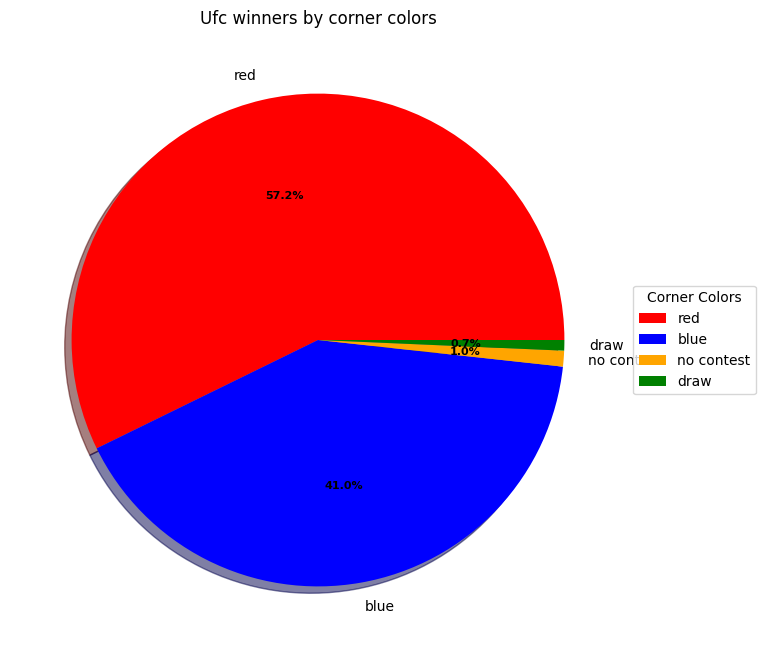

In [8]:
temp = df["winner"].value_counts()
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(temp.values, labels=temp.index, autopct='%1.1f%%',
                                   colors=['red', 'blue', 'orange', 'green'], shadow=True)
ax.set_title('Ufc winners by corner colors')
ax.legend(wedges, temp.index,
          title="Corner Colors",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")

plt.show()



# The impact of fighters' ages on the result of a fight.
**Fighters in their mid-20s to early 30s are often considered to be in their prime, as they possess a balance of physical attributes, experience, and skill development. Fighters over 35 tend to face physical decline, while those under 25 may still be developing their skills.**







<Axes: xlabel='R_Age', ylabel='Density'>

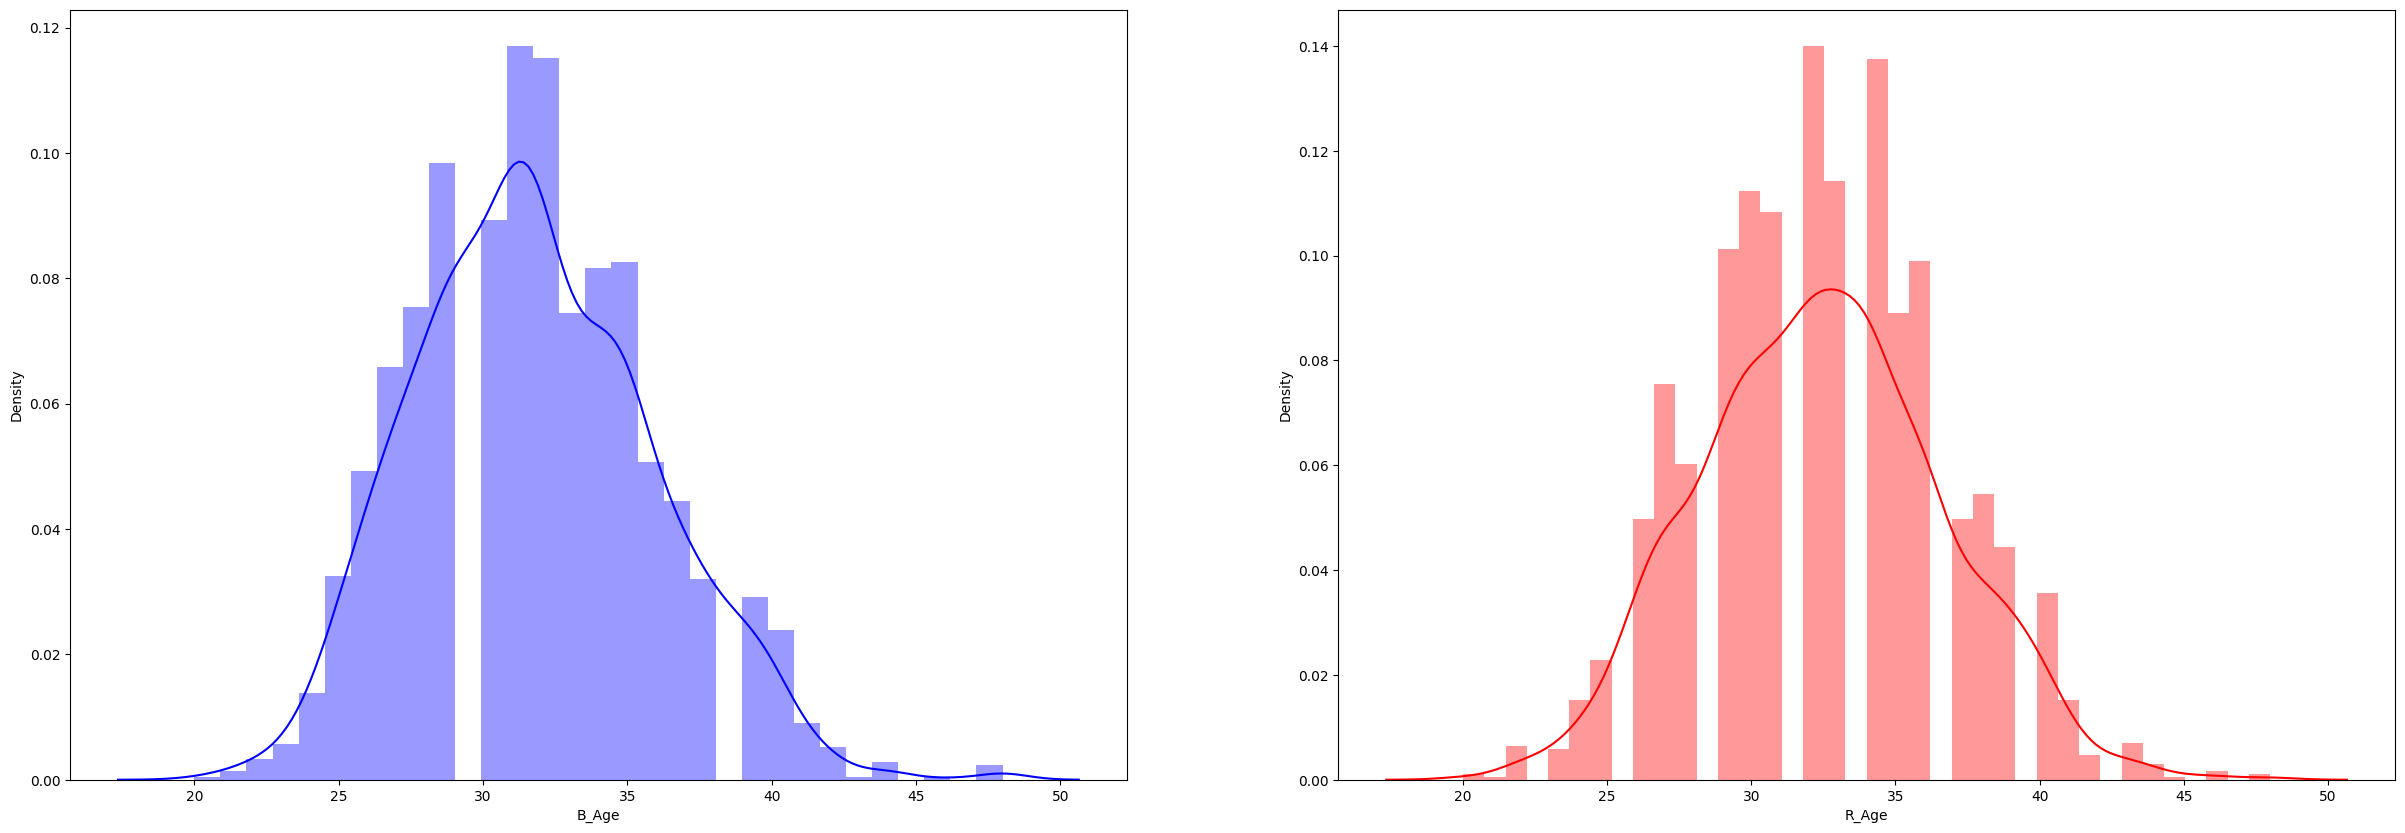

In [9]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
sns.distplot(df.B_Age, ax=ax[0],color='blue')
sns.distplot(df.R_Age, ax=ax[1],color='red')

**METHOD OF WINNING A FIGHT**

Knockout (KO): A fighter wins by knocking out their opponent, rendering them unconscious and unable to continue.

Technical Knockout (TKO): The referee stops the fight when one fighter is unable to intelligently defend themselves. This can occur due to sustained strikes or a dominant position on the ground.

Submission: A fighter wins by forcing their opponent to submit, typically by applying a joint lock or a chokehold. The opponent taps out to signal their surrender.

Decision: If the fight goes the full duration without a knockout, submission, or disqualification, judges score the bout based on effective striking, grappling, aggression, and octagon control. The fighter with the most points wins by a unanimous, split, or majority decision.**

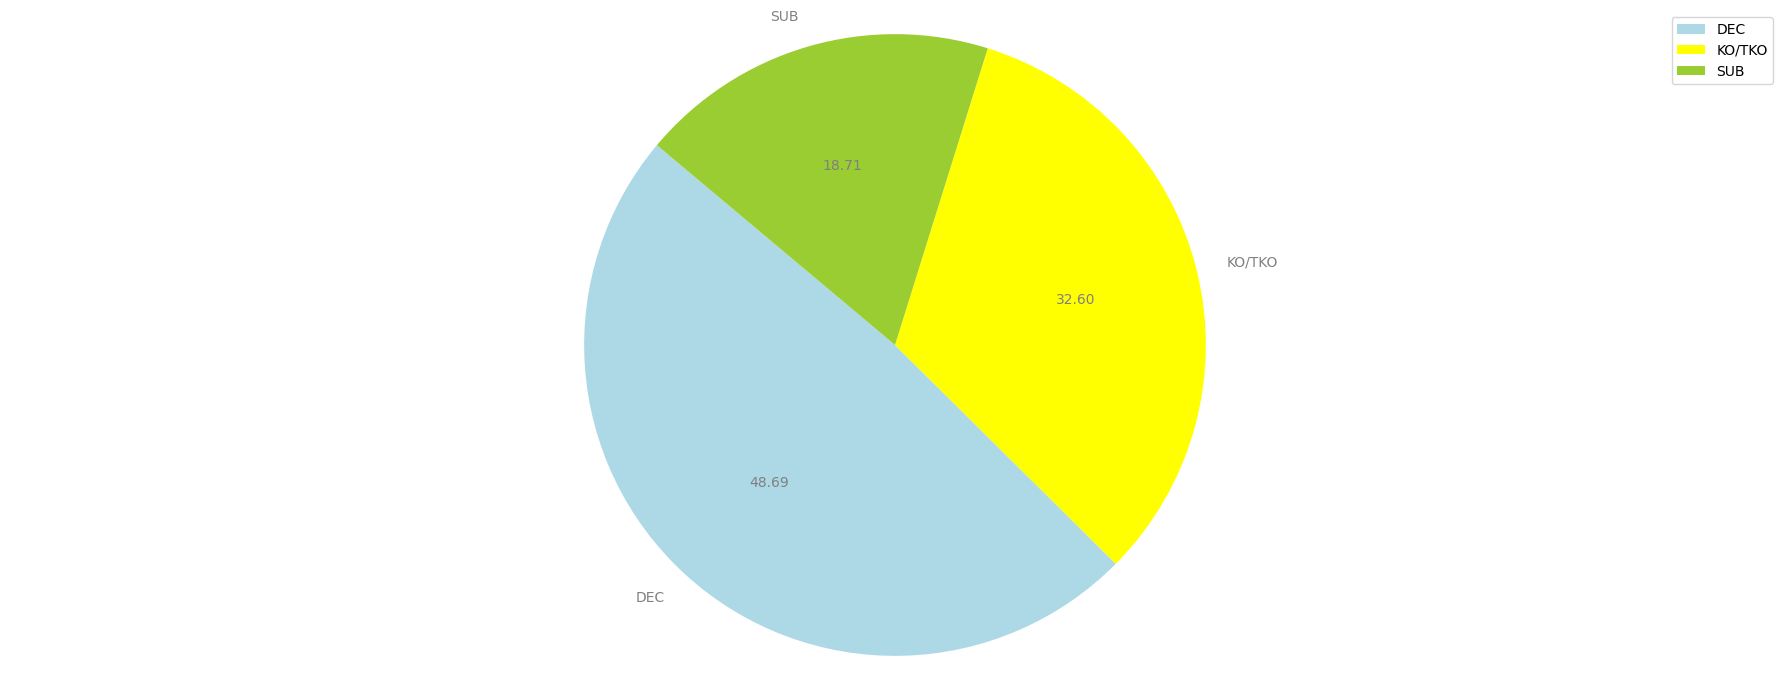

In [10]:
fig, ax = plt.subplots(figsize=(18,7))

temp = df["winby"].value_counts()

labels = temp.index
sizes = temp.values

patches, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%.2f', colors=['lightblue', 'yellow', 'yellowgreen'], startangle=140)

for text in texts:
    text.set_color('grey')
for autotext in autotexts:
    autotext.set_color('grey')

ax.legend(labels, loc="best")

ax.axis('equal')

plt.tight_layout()

plt.show()

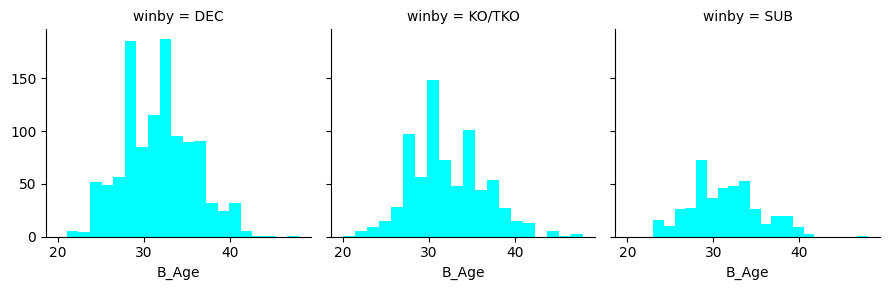

In [11]:
g = sns.FacetGrid(df, col='winby')
g.map(plt.hist, 'B_Age', bins=20,color='cyan')

Fighters in their early twenties may be in their physical prime, possessing peak athletic abilities, endurance, and agility. This physical condition allows them to perform well throughout the entire duration of a fight, which can be beneficial in decision outcomes.

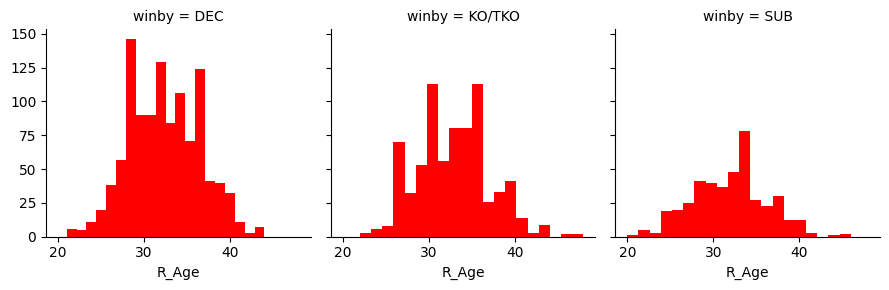

In [12]:
g = sns.FacetGrid(df, col='winby')
g.map(plt.hist, 'R_Age', bins=20,color='red')

Older fighters might face opponents who are also in the later stages of their careers, potentially experiencing declines in speed, endurance, and overall physical condition. This can make it easier for older fighters to finish the fight.                                                                      Older fighters may be motivated to make a statement or leave a lasting impression in the later stages of their careers. This motivation can result in a more aggressive fighting style, aiming for decisive victories rather than relying on the judges' scorecards.   

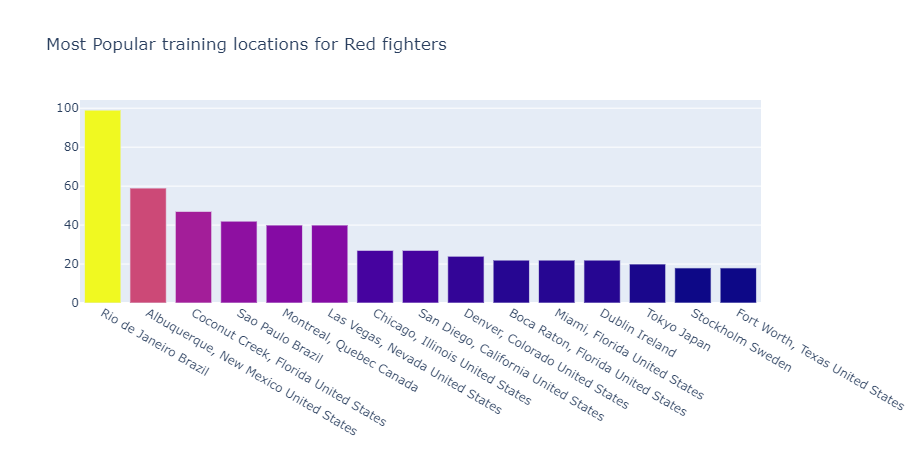

In [13]:
cnt_srs = df['R_Location'].value_counts().head(15)

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
    ),
)

layout = go.Layout(
    title='Most Popular training locations for Red fighters'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename="Ratio")

Brazil has emerged as a highly popular training spot for UFC fighters due to a combination of factors that make it a conducive environment for skill development and preparation. One key aspect is the rich history of mixed martial arts (MMA) in Brazil, with a deep-rooted culture of Brazilian Jiu-Jitsu (BJJ) that has produced some of the sport's legendary figures. The presence of renowned BJJ academies and experienced coaches attracts fighters worldwide to hone their ground game and grappling skills.


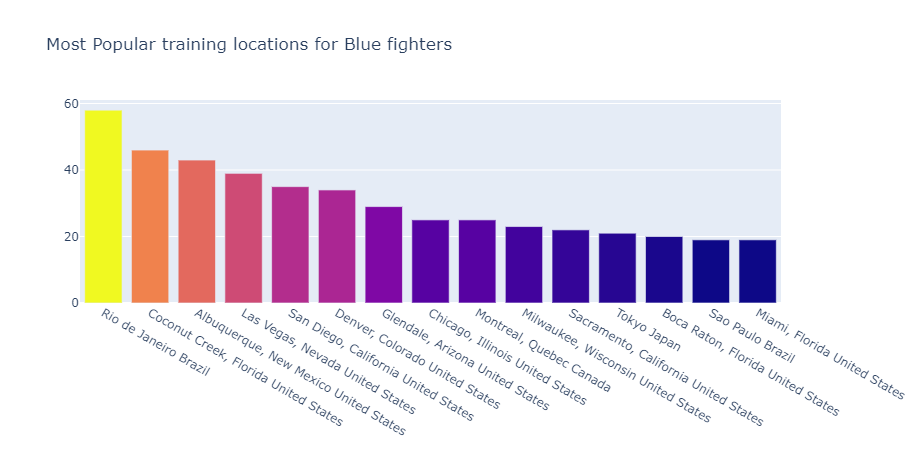

In [14]:
cnt_srs = df['B_Location'].value_counts().head(15)

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
    ),
)

layout = go.Layout(
    title='Most Popular training locations for Blue fighters'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename="Ratio")

Brazil's historical significance in MMA, diverse training environment, experienced coaching, competitive atmosphere, and cost-effectiveness collectively contribute to making it the most popular training spot for UFC fighters, attracting talents from around the globe eager to enhance their skills and pursue success in the world of mixed martial arts.







**Graph on striking**

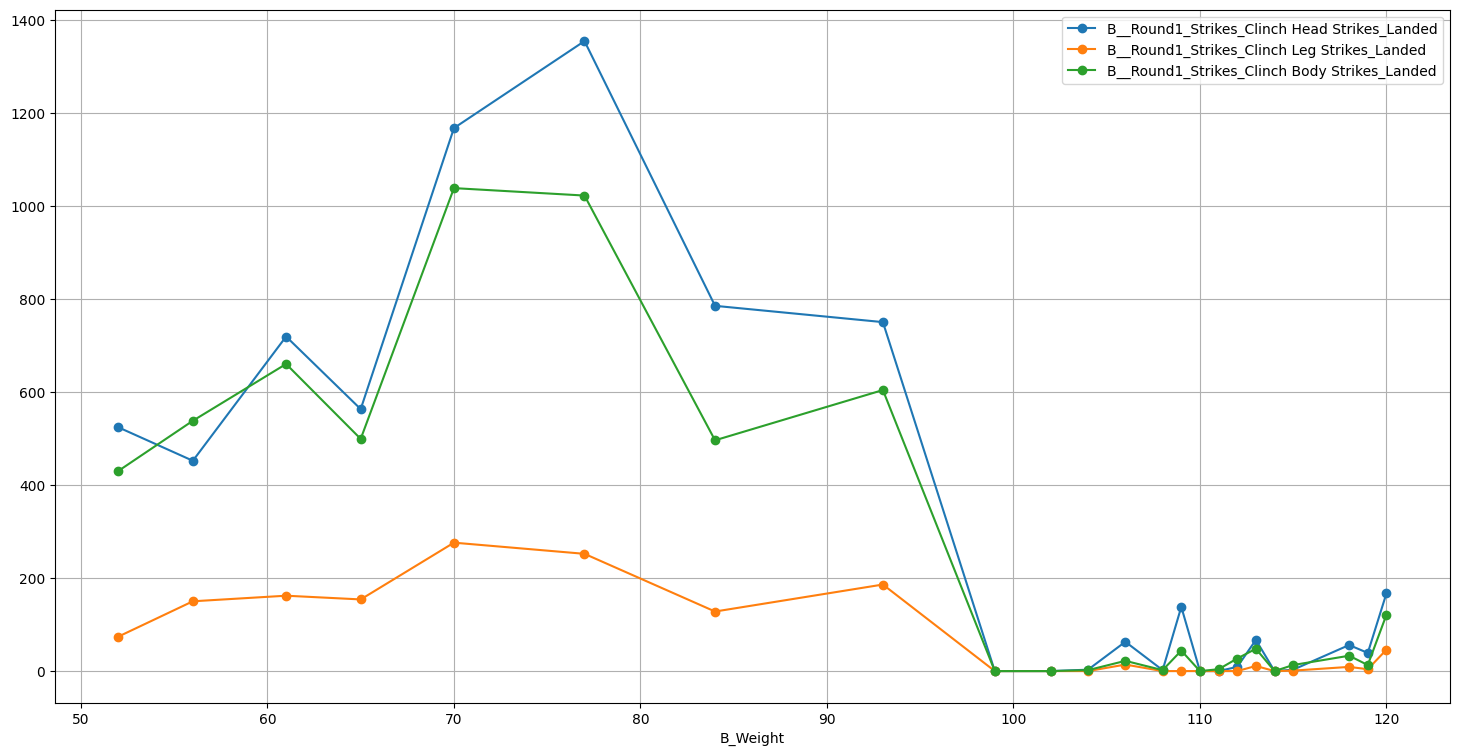

In [22]:
strk1 = df[['B_Weight', 'B__Round1_Strikes_Clinch Head Strikes_Landed', 'B__Round1_Strikes_Clinch Leg Strikes_Landed', 'B__Round1_Strikes_Clinch Body Strikes_Landed']].groupby('B_Weight').sum()


strk1.plot(kind='line', figsize=(18,9), marker='o')
plt.grid(True)#if you do not mention this line the grids wont be there.
plt.show()

This shows that in round 1 when fighters are fresh they prefer to land more punches/ strikes.

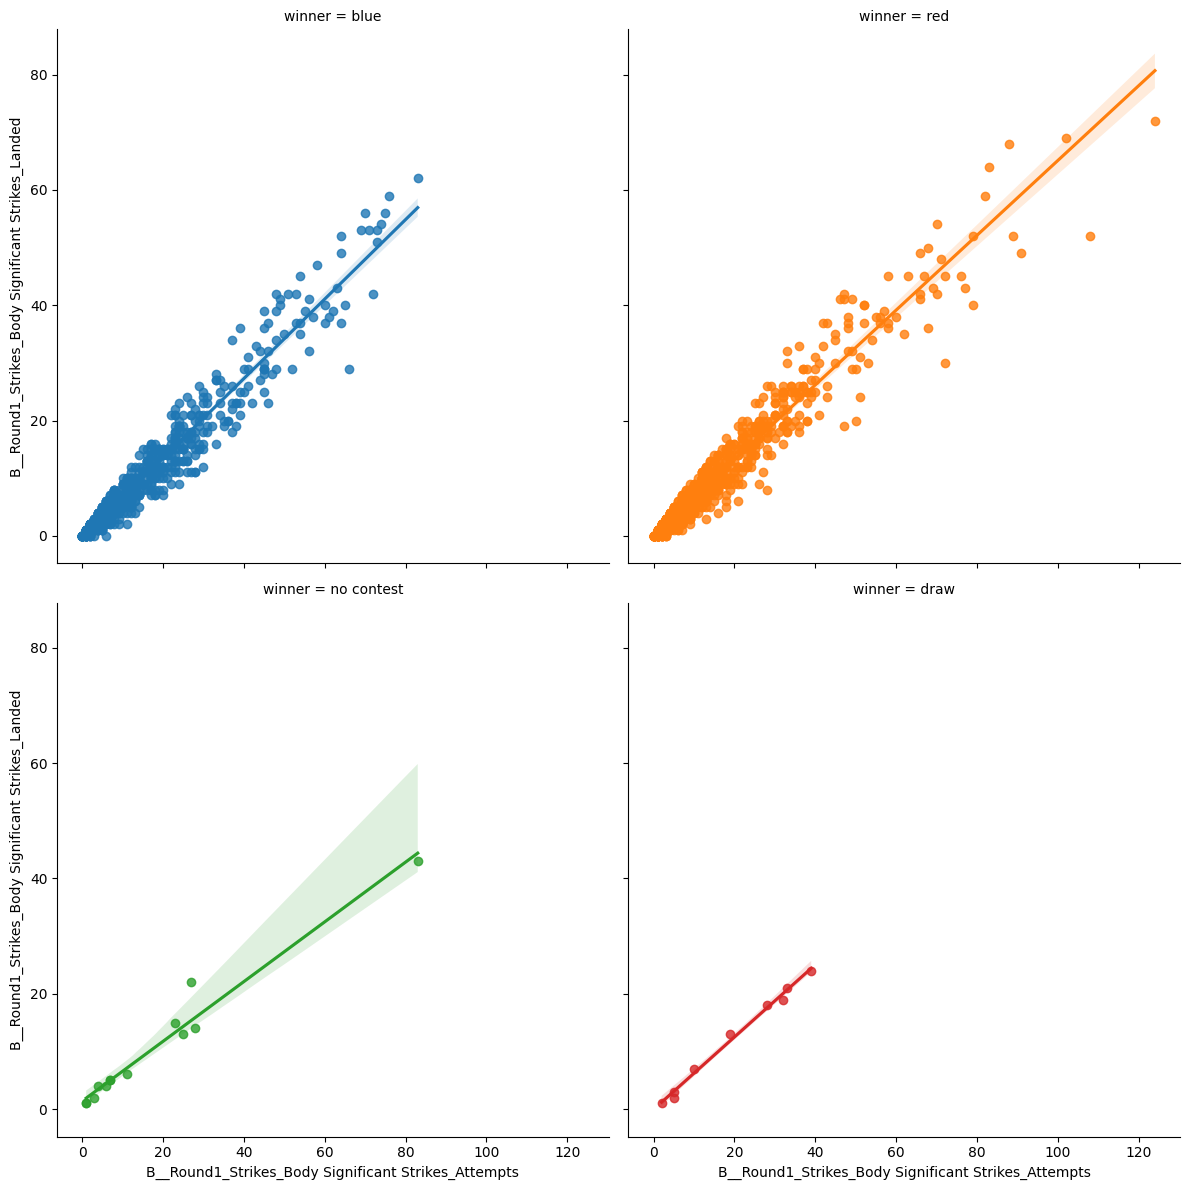

In [24]:
sns.lmplot(x="B__Round1_Strikes_Body Significant Strikes_Attempts", 
           y="B__Round1_Strikes_Body Significant Strikes_Landed", 
           col="winner", hue="winner", data=df, col_wrap=2, height=6)

plt.show()

Attempts and strikes landed are perfectly linear as suggested before.Of course in a few cases where you are fighting a counter striker and a south paw like Conor Mcgregor or Anderson Silva the probabbility of landing a strike may not be as high.